In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Bases/Criados/5_base_codificada.csv")

In [2]:
print(df['Renda'].value_counts(dropna=False))

Renda
1    8416
2    4543
0    2519
3    1850
5    1722
4    1449
Name: count, dtype: int64


In [3]:
df['V0031'] = df['V0031'].replace({3: 2, 4: 3})
df['N011'] = df['N011'].replace({4: 3})
df['Renda'] = df['Renda'].replace({0: 1, 4: 3, 5: 4}) #valor 0 (Sem renda) e valor 1 (Até 1 SM) + valor 3 (2-3 SM) e valor 4 (3-5 SM)

In [4]:
print(df['Renda'].value_counts(dropna=False))

Renda
1    10935
2     4543
3     3299
4     1722
Name: count, dtype: int64


In [5]:
# Lista de atributos a recodificar
atributos = ['P00901', 'P01101', 'P02001', 'P018', 'P02002', 'P02501', 'P02602']

# Função de recodificação
def recodificar_dias(valor):
    if valor == 0.0:
        return 1
    elif 1.0 <= valor <= 3.0:
        return 2
    elif 4.0 <= valor <= 6.0:
        return 3
    elif valor == 7.0:
        return 4
    else:
        return pd.NA  # ou np.nan, dependendo do seu tratamento de missing

# Aplicar a função a cada coluna
for col in atributos:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].apply(recodificar_dias)


In [6]:
df.to_csv('../Bases/Criados/5.1_base_reduzida.csv', index=False)

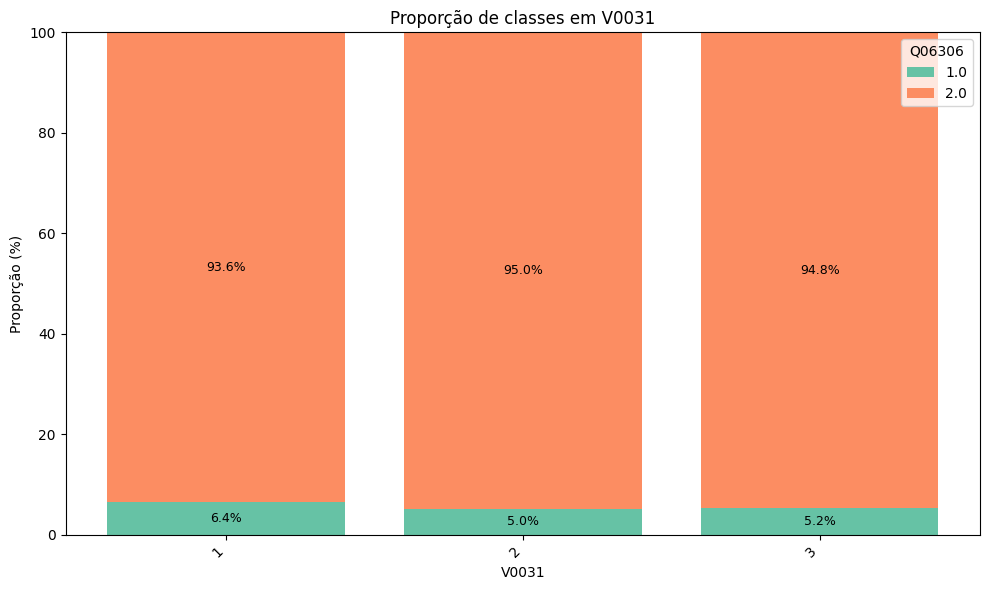

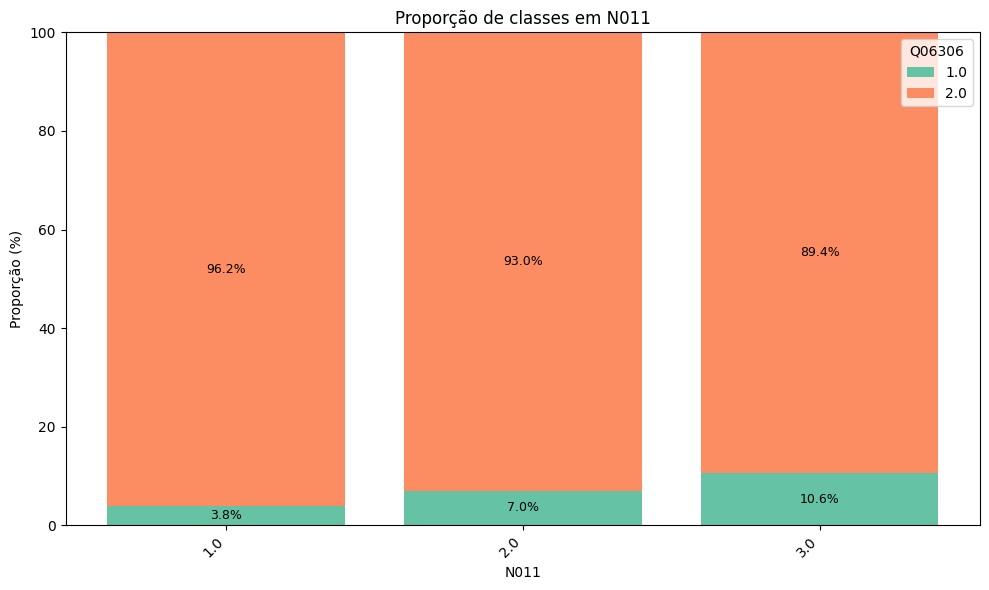

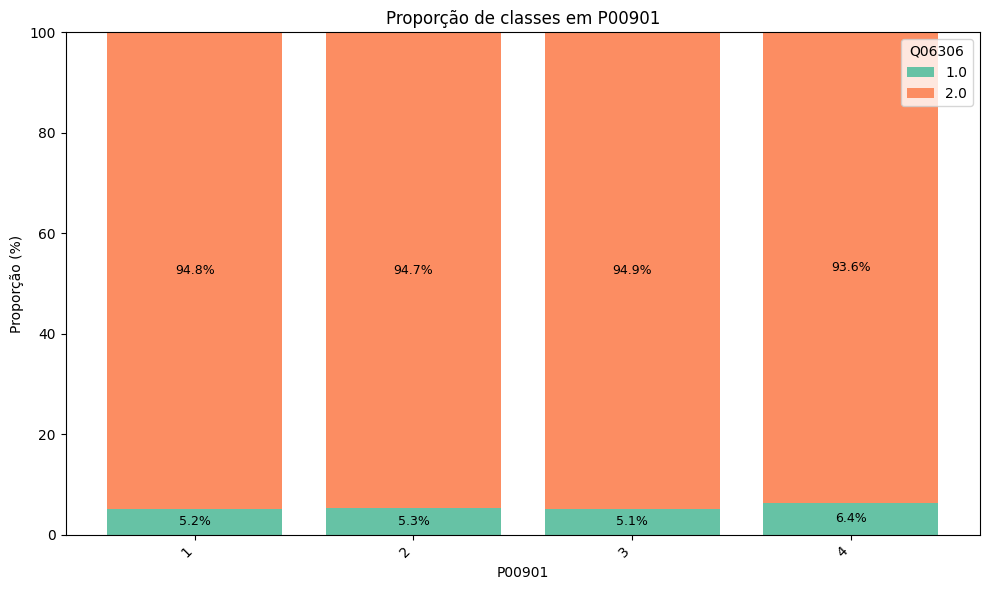

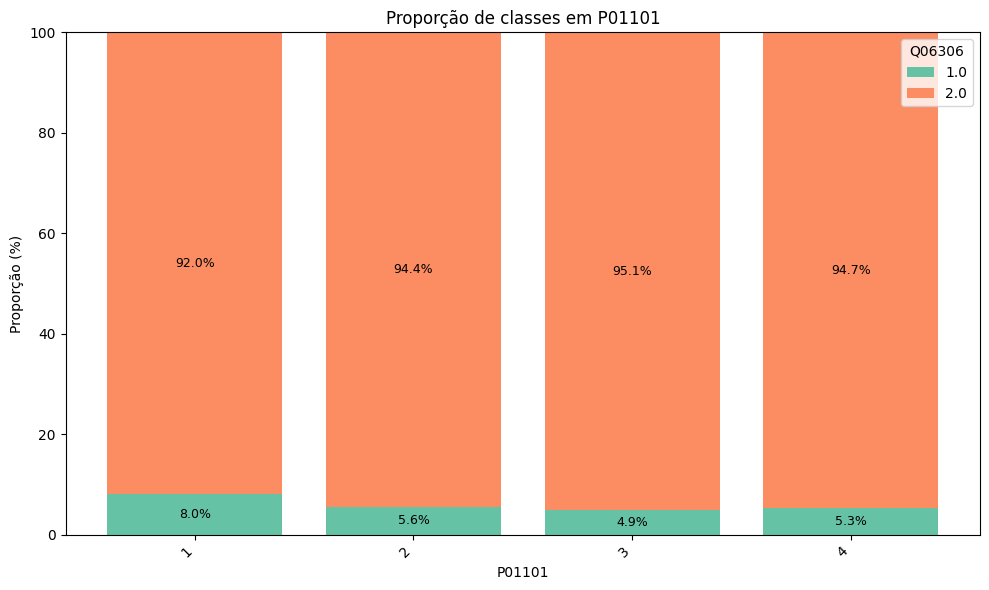

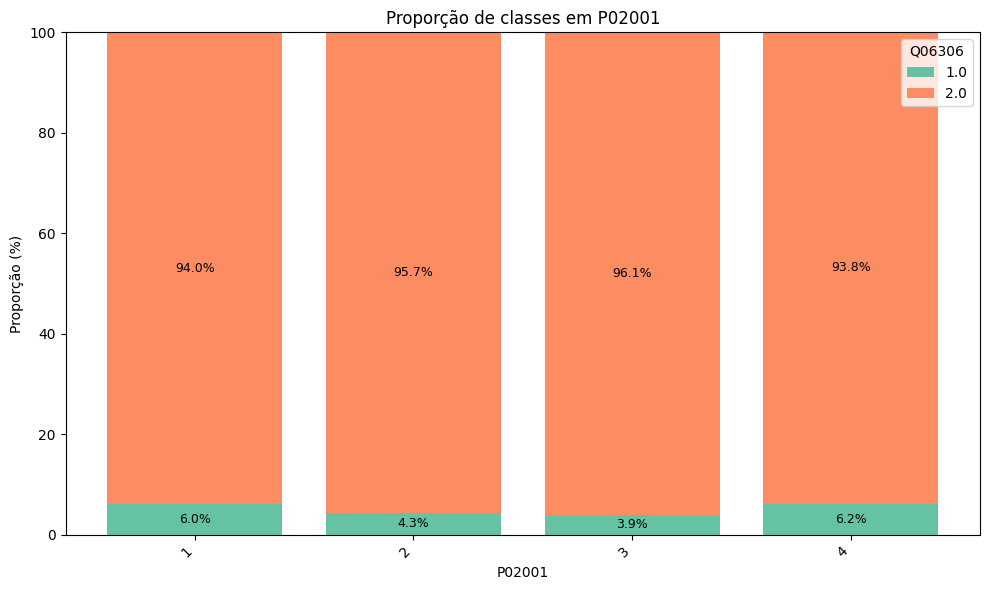

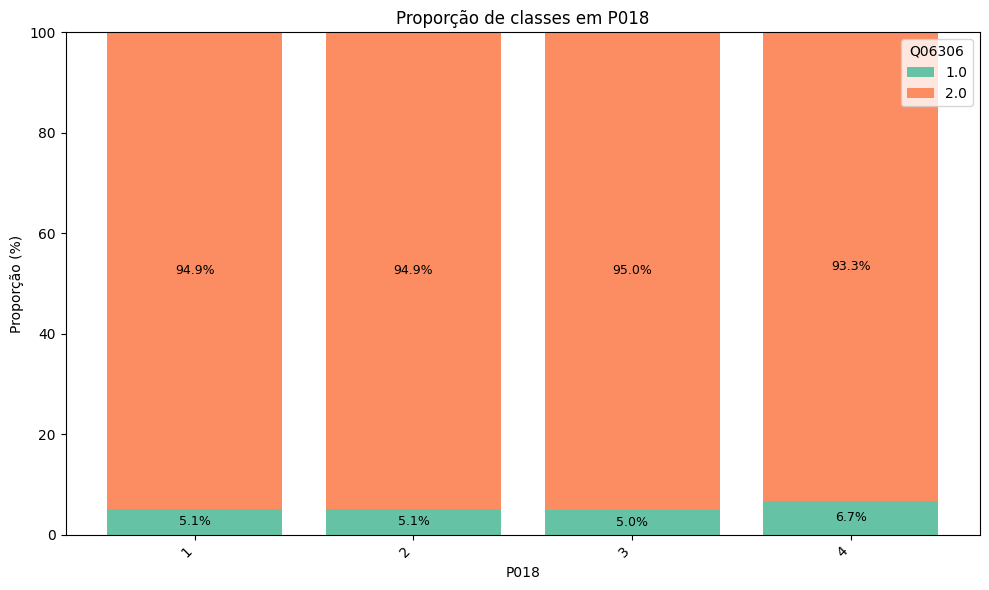

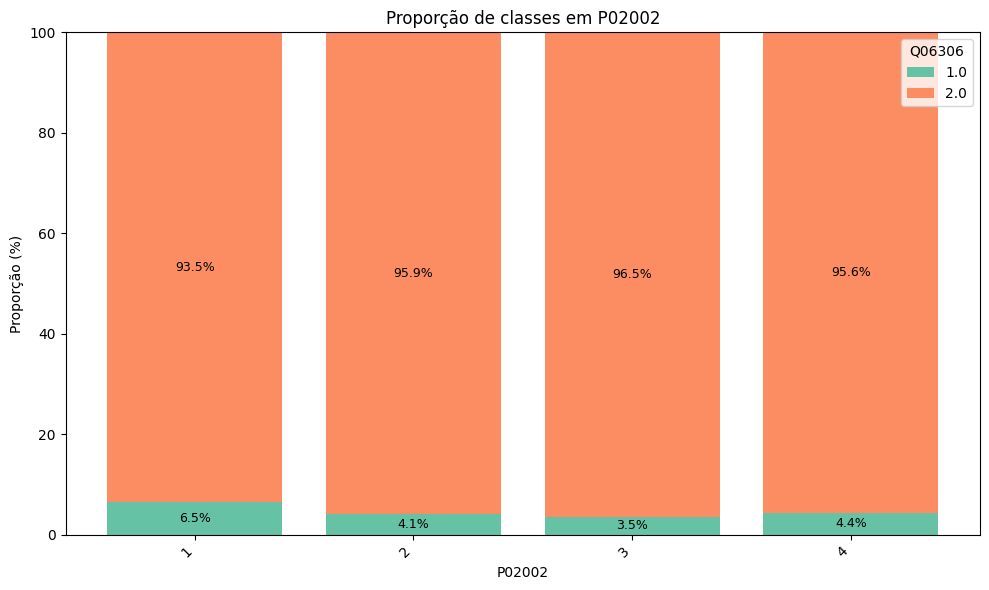

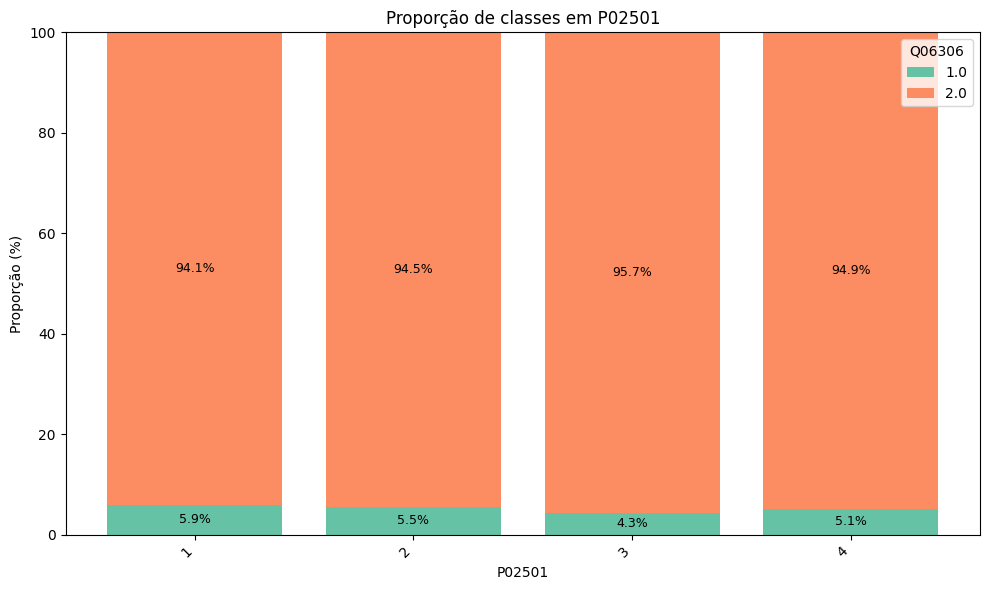

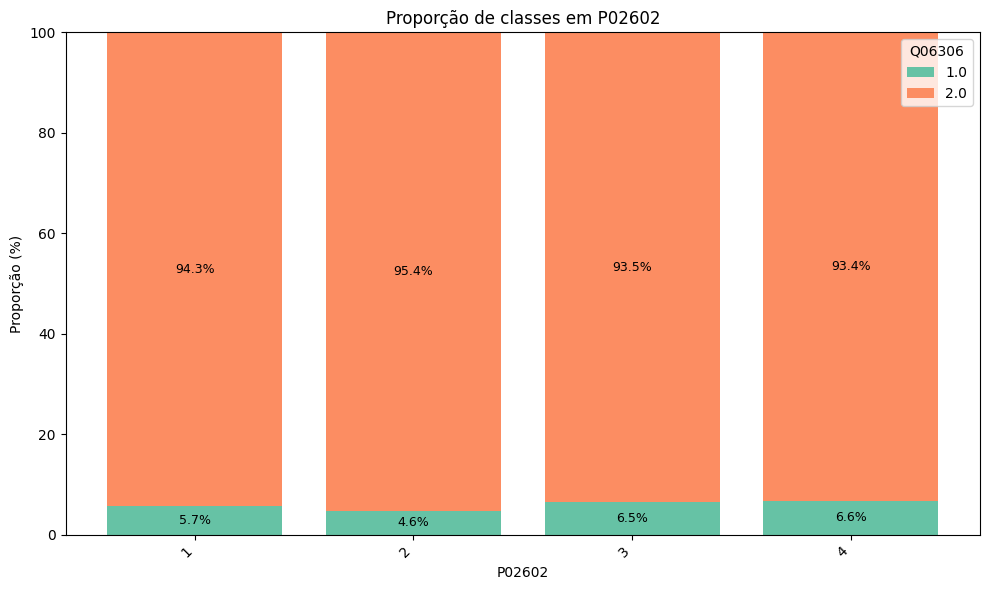

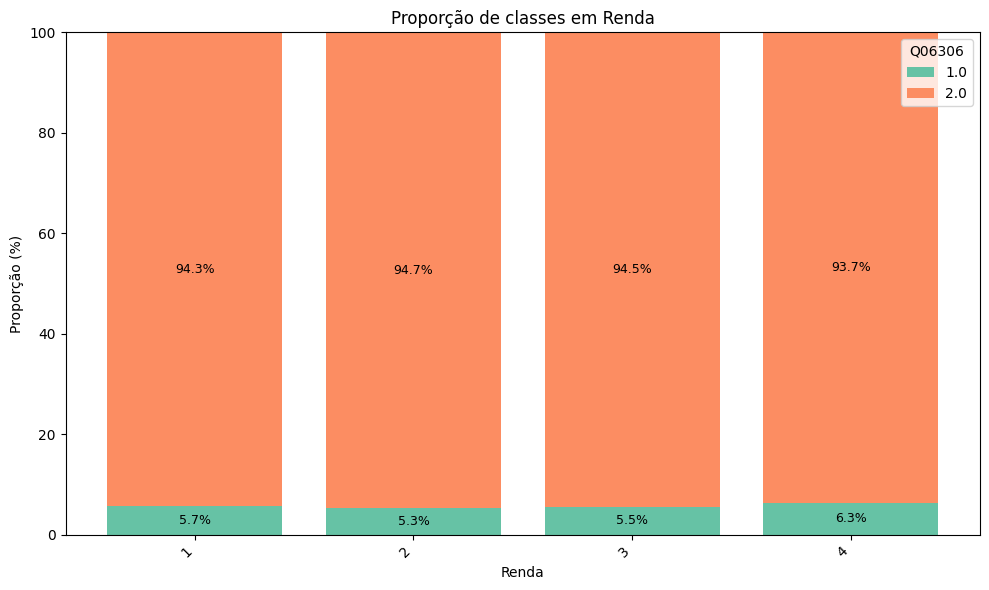

In [7]:
# Caminho para o CSV
caminho_arquivo = "../Bases/Criados/5.1_base_reduzida.csv"
coluna_classe = "Q06306"

# Lê os dados
df = pd.read_csv(caminho_arquivo, dtype=str)

# Verifica a variável de classe
if coluna_classe not in df.columns:
    raise ValueError(f"A coluna '{coluna_classe}' não está presente na base.")

# Colunas categóricas 
colunas = ['V0031', 'N011', 'P00901', 'P01101', 'P02001', 'P018', 'P02002', 'P02501', 'P02602', 'Renda']

for col in colunas:
    # Calcula a contagem
    tabela = df.groupby([col, coluna_classe]).size().unstack(fill_value=0)

    # Converte para proporção
    proporcoes = tabela.div(tabela.sum(axis=1), axis=0) * 100

    # Plot
    plt.figure(figsize=(10, 6))
    bottom = pd.Series([0] * len(proporcoes), index=proporcoes.index)

    cores = plt.get_cmap('Set2').colors  # Paleta de cores
    for i, classe in enumerate(proporcoes.columns):
        plt.bar(proporcoes.index, proporcoes[classe], bottom=bottom, 
                label=classe, color=cores[i % len(cores)])
        
        # Adiciona os rótulos de porcentagem
        for j, valor in enumerate(proporcoes[classe]):
            if valor > 0:
                plt.text(j, bottom.iloc[j] + valor / 2, f'{valor:.1f}%', 
                         ha='center', va='center', fontsize=9, color='black')
        
        bottom += proporcoes[classe]

    plt.title(f'Proporção de classes em {col}')
    plt.ylabel('Proporção (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.legend(title=coluna_classe)
    plt.tight_layout()
    plt.show()